<a href="https://colab.research.google.com/github/akshi-saxena/airbnb-price-prediction/blob/main/Airbnb_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#New York Airbnb Price Prediction

Data Source: http://insideairbnb.com/get-the-data/

Goal: Predict Airbnb prices

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

file_path = '/content/drive/MyDrive/DS5110 IDMP/data/listings.csv'
raw_price_data = pd.read_csv(file_path)
raw_price_data.head()

<ipython-input-2-1d8c9f59adae>:4: DtypeWarning: Columns (68) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_price_data = pd.read_csv(file_path)


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2595,https://www.airbnb.com/rooms/2595,20221204162430,2022-12-05,city scrape,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,https://a0.muscache.com/pictures/f0813a11-40b2...,2845,...,4.80,4.81,4.40,NaN,f,3,3,0,0,0.31
1,5203,https://www.airbnb.com/rooms/5203,20221204162430,2022-12-05,previous scrape,Cozy Clean Guest Room - Family Apt,"Our best guests are seeking a safe, clean, spa...",Our neighborhood is full of restaurants and ca...,https://a0.muscache.com/pictures/103776/b37157...,7490,...,4.95,4.94,4.92,NaN,f,1,0,1,0,0.73
2,5136,https://www.airbnb.com/rooms/5136,20221204162430,2022-12-04,city scrape,"Spacious Brooklyn Duplex, Patio + Garden",We welcome you to stay in our lovely 2 br dupl...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,7378,...,5.00,4.67,5.00,NaN,f,1,1,0,0,0.03
3,5121,https://www.airbnb.com/rooms/5121,20221204162430,2022-12-05,city scrape,BlissArtsSpace!,One room available for rent in a 2 bedroom apt...,NaN,https://a0.muscache.com/pictures/2090980c-b68e...,7356,...,4.91,4.47,4.52,NaN,f,2,0,2,0,0.30
4,6848,https://www.airbnb.com/rooms/6848,20221204162430,2022-12-05,city scrape,Only 2 stops to Manhattan studio,Comfortable studio apartment with super comfor...,NaN,https://a0.muscache.com/pictures/e4f031a7-f146...,15991,...,4.80,4.67,4.56,NaN,f,1,1,0,0,1.13


In [3]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None
raw_price_data.head().T

,0,1,2,3,4
id,2595,5203,5136,5121,6848
listing_url,https://www.airbnb.com/rooms/2595,https://www.airbnb.com/rooms/5203,https://www.airbnb.com/rooms/5136,https://www.airbnb.com/rooms/5121,https://www.airbnb.com/rooms/6848
scrape_id,20221204162430,20221204162430,20221204162430,20221204162430,20221204162430
last_scraped,2022-12-05,2022-12-05,2022-12-04,2022-12-05,2022-12-05
source,city scrape,previous scrape,city scrape,city scrape,city scrape
name,Skylit Midtown Castle,Cozy Clean Guest Room - Family Apt,"Spacious Brooklyn Duplex, Patio + Garden",BlissArtsSpace!,Only 2 stops to Manhattan studio
description,"Beautiful, spacious skylit studio in the heart...","Our best guests are seeking a safe, clean, spa...",We welcome you to stay in our lovely 2 br dupl...,One room available for rent in a 2 bedroom apt...,Comfortable studio apartment with super comfor...
neighborhood_overview,Centrally located in the heart of Manhattan ju...,Our neighborhood is full of restaurants and ca...,NaN,NaN,NaN
picture_url,https://a0.muscache.com/pictures/f0813a11-40b2...,https://a0.muscache.com/pictures/103776/b37157...,https://a0.muscache.com/pictures/miso/Hosting-...,https://a0.muscache.com/pictures/2090980c-b68e...,https://a0.muscache.com/pictures/e4f031a7-f146...
host_id,2845,7490,7378,7356,15991


## Exploratory Data Analysis and Preprocessing

possible plots:

price distribution

histogram for neighbourhoods, property_type

price vs availabilty (see trend - inc/dec/none)

number of amentities vs price

In [4]:
raw_price_data.shape, raw_price_data.columns

((41533, 75),
 Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
        'description', 'neighborhood_overview', 'picture_url', 'host_id',
        'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
        'host_response_time', 'host_response_rate', 'host_acceptance_rate',
        'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
        'host_neighbourhood', 'host_listings_count',
        'host_total_listings_count', 'host_verifications',
        'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
        'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
        'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
        'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
        'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
        'maximum_minimum_nights', 'minimum_maximum_nights',
        'maximum_maximum_nights', 'minimum_nights_avg_ntm',
        

There are too many features. We won't use all of them.

Personal information about the host - host name, location, neighborhood should not be fed to a model in order to prevent any biases.

Scraping information is also not relevant for this particular problem.

Neighbourhood has a cleansed version so no need of the actual.

In [5]:
cols = ['id', 'name',
        'host_response_time', 'host_response_rate', 'host_acceptance_rate',
        'host_is_superhost', 'host_verifications',
        'host_has_profile_pic', 'host_identity_verified',
        'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
        'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms_text', 'bathrooms',
        'bedrooms', 'beds', 'amenities', 'price',
        'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
        'maximum_minimum_nights', 'minimum_maximum_nights',
        'maximum_maximum_nights', 'minimum_nights_avg_ntm',
        'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability',
        'availability_30', 'availability_60', 'availability_90',
        'availability_365', 'number_of_reviews',
        'number_of_reviews_ltm', 'number_of_reviews_l30d', 'first_review',
        'last_review', 'review_scores_rating', 'review_scores_accuracy',
        'review_scores_cleanliness', 'review_scores_checkin',
        'review_scores_communication', 'review_scores_location',
        'review_scores_value', 'license', 'instant_bookable',
        'calculated_host_listings_count',
        'calculated_host_listings_count_entire_homes',
        'calculated_host_listings_count_private_rooms',
        'calculated_host_listings_count_shared_rooms', 'reviews_per_month']

In [7]:
filtered_data = raw_price_data.loc[:, cols]

In [8]:
nulls = pd.DataFrame(filtered_data.isna().sum())
rows, cols = filtered_data.shape
for idx, row in nulls.iterrows():
  if row[0] >0:
    print(idx, row[0], "-", round((row[0]/rows)*100,2))

name 13 - 0.03
host_response_time 13645 - 32.85
host_response_rate 13645 - 32.85
host_acceptance_rate 12211 - 29.4
host_is_superhost 29 - 0.07
host_has_profile_pic 5 - 0.01
host_identity_verified 5 - 0.01
bathrooms_text 77 - 0.19
bathrooms 41533 - 100.0
bedrooms 3822 - 9.2
beds 941 - 2.27
minimum_minimum_nights 14 - 0.03
maximum_minimum_nights 14 - 0.03
minimum_maximum_nights 14 - 0.03
maximum_maximum_nights 14 - 0.03
minimum_nights_avg_ntm 14 - 0.03
maximum_nights_avg_ntm 14 - 0.03
calendar_updated 41533 - 100.0
first_review 9393 - 22.62
last_review 9393 - 22.62
review_scores_rating 9393 - 22.62
review_scores_accuracy 9841 - 23.69
review_scores_cleanliness 9831 - 23.67
review_scores_checkin 9845 - 23.7
review_scores_communication 9836 - 23.68
review_scores_location 9848 - 23.71
review_scores_value 9848 - 23.71
license 41532 - 100.0
reviews_per_month 9393 - 22.62


In [9]:
filtered_data['calendar_updated'].unique()

array([nan])

In [10]:
filtered_data['bathrooms'].unique()

array([nan])

In [11]:
filtered_data['license'].unique()

array([nan, '41662/AL'], dtype=object)

So we can drop the columns - calendar_updated and bathrooms - as they are all/mostly null.

In [12]:
filtered_data.drop(columns=['calendar_updated', 'bathrooms', 'license'], inplace=True)

In [13]:
filtered_data.dtypes

id                                                int64
name                                             object
host_response_time                               object
host_response_rate                               object
host_acceptance_rate                             object
host_is_superhost                                object
host_verifications                               object
host_has_profile_pic                             object
host_identity_verified                           object
neighbourhood_cleansed                           object
neighbourhood_group_cleansed                     object
latitude                                        float64
longitude                                       float64
property_type                                    object
room_type                                        object
accommodates                                      int64
bathrooms_text                                   object
bedrooms                                        

In [14]:
filtered_data['instant_bookable'].unique() # need to convert to bool

array(['f', 't'], dtype=object)

In [15]:
filtered_data['host_response_time'].unique() # one hot encoding

array(['within a day', nan, 'within an hour', 'within a few hours',
       'a few days or more'], dtype=object)

In [16]:
filtered_data['host_response_rate'].unique() # need to remove percentages and convert to int - impute nans

array(['72%', nan, '90%', '100%', '94%', '33%', '80%', '60%', '91%',
       '99%', '0%', '93%', '67%', '83%', '50%', '88%', '78%', '92%',
       '63%', '75%', '82%', '86%', '70%', '71%', '89%', '96%', '40%',
       '73%', '20%', '98%', '97%', '64%', '85%', '87%', '25%', '62%',
       '43%', '84%', '56%', '58%', '95%', '38%', '13%', '10%', '22%',
       '65%', '17%', '14%', '44%', '81%', '79%', '57%', '61%', '77%',
       '69%', '26%', '55%', '76%', '30%', '29%', '46%', '68%', '31%',
       '74%', '53%', '54%', '41%', '51%'], dtype=object)

In [17]:
filtered_data['host_acceptance_rate'].unique() # need to remove percentages and convert to int - impute nans

array(['22%', nan, '50%', '82%', '100%', '13%', '54%', '98%', '96%',
       '97%', '0%', '83%', '95%', '86%', '85%', '46%', '40%', '67%',
       '10%', '25%', '99%', '87%', '88%', '33%', '38%', '20%', '61%',
       '73%', '60%', '65%', '64%', '30%', '94%', '89%', '91%', '93%',
       '78%', '35%', '5%', '36%', '75%', '53%', '43%', '39%', '70%',
       '80%', '92%', '23%', '17%', '49%', '76%', '63%', '69%', '57%',
       '74%', '62%', '79%', '21%', '90%', '84%', '14%', '71%', '81%',
       '77%', '55%', '72%', '15%', '29%', '44%', '45%', '47%', '19%',
       '56%', '68%', '28%', '52%', '59%', '34%', '48%', '27%', '18%',
       '66%', '58%', '7%', '42%', '11%', '32%', '16%', '51%', '26%',
       '12%', '41%', '37%', '4%', '8%', '31%', '9%', '6%', '24%'],
      dtype=object)

In [18]:
filtered_data['host_is_superhost'].unique() # need to convert to bool - impute nans

array(['f', 't', nan], dtype=object)

In [19]:
filtered_data['host_has_profile_pic'].unique() # need to convert to bool - impute nans

array(['t', 'f', nan], dtype=object)

In [20]:
filtered_data['host_identity_verified'].unique() # need to convert to bool - impute nans

array(['t', 'f', nan], dtype=object)

Also change instant_bookable and has_availability to bool

In [21]:
filtered_data['host_verifications'].unique() # one hot encoding - take care of empty list

array(["['email', 'phone', 'work_email']", "['email', 'phone']",
       "['phone']", "['phone', 'work_email']", 'None', "['email']", '[]',
       "['email', 'work_email']"], dtype=object)

In [22]:
filtered_data['neighbourhood_cleansed'].unique() # one hot encoding or word 2 vec? - might need to do dimentionality reduction later if one hot

array(['Midtown', 'Upper West Side', 'Sunset Park', 'Bedford-Stuyvesant',
       'Williamsburg', 'East Harlem', 'Fort Greene', "Hell's Kitchen",
       'South Slope', 'Harlem', 'East Village', 'Flatbush',
       'Long Island City', 'West Village', 'Lower East Side',
       'East Flatbush', 'Greenpoint', 'Clinton Hill', 'Chelsea',
       'Clason Point', 'Eastchester', 'Prospect Heights',
       'Washington Heights', 'Upper East Side', 'Boerum Hill', 'Kips Bay',
       'Crown Heights', 'Nolita', 'Sunnyside', 'Carroll Gardens',
       'Park Slope', 'St. George', 'Gowanus', 'Astoria', 'Ridgewood',
       'Rockaway Beach', 'Mott Haven', 'Morningside Heights',
       'Ditmars Steinway', 'Middle Village', 'Jamaica', 'Chinatown',
       'Greenwich Village', 'Brooklyn Heights', 'Kingsbridge',
       'Flatiron District', 'Windsor Terrace', 'Forest Hills', 'Tribeca',
       'Murray Hill', 'Bushwick', 'Stuyvesant Town', 'Sheepshead Bay',
       'Arrochar', 'East New York', 'Emerson Hill', 'Bensonh

In [23]:
filtered_data['neighbourhood_group_cleansed'].unique() # one hot or word to vec

array(['Manhattan', 'Brooklyn', 'Queens', 'Bronx', 'Staten Island'],
      dtype=object)

In [24]:
filtered_data['property_type'].unique()

array(['Entire rental unit', 'Private room in rental unit',
       'Private room in condo', 'Entire guest suite',
       'Private room in loft', 'Entire loft', 'Private room in townhouse',
       'Private room in home', 'Entire condo', 'Entire home',
       'Entire townhouse', 'Room in boutique hotel',
       'Entire serviced apartment', 'Private room in bed and breakfast',
       'Entire guesthouse', 'Private room in guest suite',
       'Shared room in loft', 'Shared room in rental unit',
       'Private room in houseboat', 'Shared room in home', 'Private room',
       'Entire place', 'Private room in guesthouse', 'Boat',
       'Room in aparthotel', 'Room in serviced apartment',
       'Entire cottage', 'Private room in religious building',
       'Private room in serviced apartment', 'Cave', 'Tiny home',
       'Entire bungalow', 'Shared room in condo', 'Floor',
       'Room in hotel', 'Private room in hostel',
       'Shared room in townhouse', 'Houseboat',
       'Private room in

In [25]:
filtered_data['room_type'].unique() # Basically cleaned property type? So drop property type

array(['Entire home/apt', 'Private room', 'Hotel room', 'Shared room'],
      dtype=object)

In [26]:
filtered_data['bathrooms_text'].unique() # change to numeric - impute nans

array(['1 bath', '1 shared bath', '1.5 baths', nan, '1 private bath',
       '2 baths', '2.5 baths', '3 baths', '1.5 shared baths',
       '2 shared baths', 'Half-bath', '0 baths', '4 baths',
       '0 shared baths', 'Shared half-bath', 'Private half-bath',
       '5.5 baths', '4.5 baths', '2.5 shared baths', '3.5 baths',
       '15.5 baths', '5 baths', '3 shared baths', '4 shared baths',
       '6 baths', '3.5 shared baths', '4.5 shared baths', '6.5 baths',
       '7 baths', '6 shared baths', '8 baths'], dtype=object)

In [27]:
filtered_data['amenities'].unique() # use bag of words? or chuck it since not in scope?

array(['["Carbon monoxide alarm", "Stove", "Bathtub", "TV", "Kitchen", "Iron", "Long term stays allowed", "Essentials", "Bed linens", "Self check-in", "Free street parking", "Keypad", "Refrigerator", "Ethernet connection", "Extra pillows and blankets", "Cleaning available during stay", "Dedicated workspace", "Air conditioning", "Coffee maker", "Smoke alarm", "Heating", "Hot water", "Wifi", "Oven", "Luggage dropoff allowed", "Paid parking off premises", "Cooking basics", "Hangers", "Baking sheet", "Dishes and silverware", "Fire extinguisher", "Hair dryer"]',
       '["Hair dryer", "Smoke alarm", "Carbon monoxide alarm", "Shampoo", "Heating", "Hot water", "Wifi", "Fire extinguisher", "Free street parking", "Elevator", "Paid parking off premises", "Host greets you", "Breakfast", "Essentials", "Air conditioning"]',
       '["HDTV with Disney+, HBO Max, standard cable, Roku, Netflix", "Smoke alarm", "Carbon monoxide alarm", "Private backyard \\u2013 Fully fenced", "Outdoor dining area", "Wa

In [28]:
filtered_data['first_review'].unique() # first review and last review to datetime - only for analysis - no need for model

array(['2009-11-21', '2009-09-07', '2014-01-02', ..., '2022-11-11',
       '2022-11-29', '2022-11-18'], dtype=object)

In [29]:
def convert_str_to_bool(var: str):
  
  if var == 't':
    return True
  else:
    return False

def remove_char_from_str(var, chars):
  
  if not pd.isnull(var):
    for char in chars:
      var = var.replace(char, '')
    return float(var)
  
  return var
  
def baths_str_to_num(var: str):
  
  if not pd.isnull(var):
    words = var.lower().split(' ')

    if 'half-bath' in words:
      return 0.5
    else:
      return float(words[0])
  
  return var


filtered_data['instant_bookable'] = filtered_data['instant_bookable'].apply(convert_str_to_bool).astype(float)
filtered_data['host_is_superhost'] = filtered_data['host_is_superhost'].apply(convert_str_to_bool).astype(float)
filtered_data['host_has_profile_pic'] = filtered_data['host_has_profile_pic'].apply(convert_str_to_bool).astype(float)
filtered_data['host_identity_verified'] = filtered_data['host_identity_verified'].apply(convert_str_to_bool).astype(float)
filtered_data['has_availability'] = filtered_data['has_availability'].apply(convert_str_to_bool).astype(float)

filtered_data['host_response_rate'] = filtered_data['host_response_rate'].apply(remove_char_from_str, chars=['%'])
filtered_data['host_acceptance_rate'] = filtered_data['host_acceptance_rate'].apply(remove_char_from_str, chars=['%'])

filtered_data['price'] = filtered_data['price'].apply(remove_char_from_str, chars=['$',','])

filtered_data['baths_cleaned'] = filtered_data['bathrooms_text'].apply(baths_str_to_num)
filtered_data.drop(columns=['bathrooms_text'], inplace = True)

In [30]:
filtered_data.head().T

,0,1,2,3,4
id,2595,5203,5136,5121,6848
name,Skylit Midtown Castle,Cozy Clean Guest Room - Family Apt,"Spacious Brooklyn Duplex, Patio + Garden",BlissArtsSpace!,Only 2 stops to Manhattan studio
host_response_time,within a day,NaN,NaN,within a day,within an hour
host_response_rate,72.0,NaN,NaN,90.0,100.0
host_acceptance_rate,22.0,NaN,50.0,82.0,100.0
host_is_superhost,0.0,0.0,0.0,1.0,0.0
host_verifications,"['email', 'phone', 'work_email']","['email', 'phone']","['email', 'phone']","['email', 'phone']","['email', 'phone']"
host_has_profile_pic,1.0,1.0,1.0,1.0,1.0
host_identity_verified,1.0,1.0,1.0,1.0,1.0
neighbourhood_cleansed,Midtown,Upper West Side,Sunset Park,Bedford-Stuyvesant,Williamsburg


In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

def histogram_plot(title, data, thresh=0):

  data = data.value_counts()[data.value_counts() > thresh]

  x = list(data.keys())
  x = x[::-1]
    
  y = list(data)
  y = y[::-1]

  fig, ax = plt.subplots(1, 1)
  
  plt.barh(x,y)
  plt.title(title)

  return fig, ax

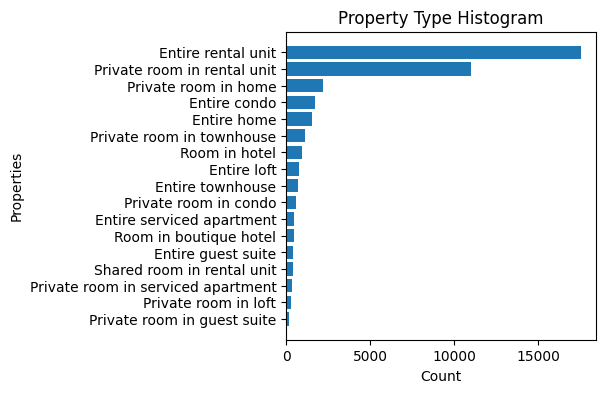

In [32]:
fig, ax = histogram_plot('Property Type Histogram', filtered_data['property_type'], thresh=100)
fig.set_size_inches(4, 4)
ax.set_xlabel('Count')
ax.set_ylabel('Properties');

so we can club the remaining (below 100) as 'Other' category

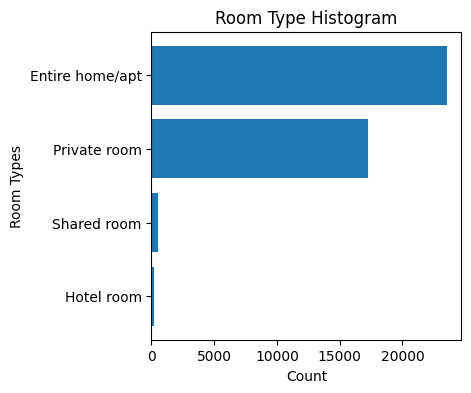

In [33]:
fig, ax = histogram_plot('Room Type Histogram', filtered_data['room_type'])
fig.set_size_inches(4, 4)
ax.set_xlabel('Count')
ax.set_ylabel('Room Types');

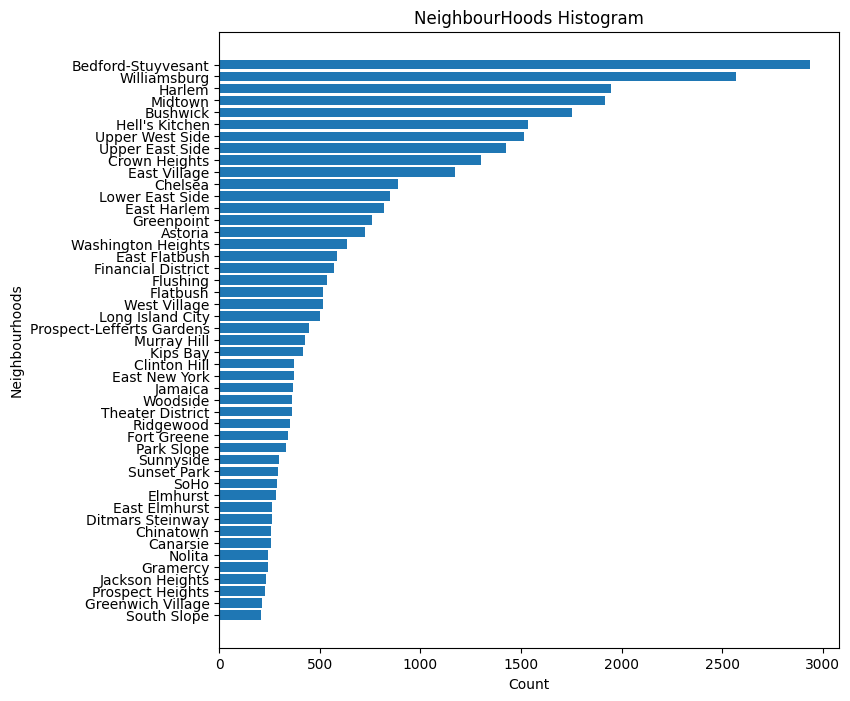

In [34]:
fig, ax = histogram_plot('NeighbourHoods Histogram', filtered_data['neighbourhood_cleansed'], thresh=200)
fig.set_size_inches(8, 8)
ax.set_xlabel('Count')
ax.set_ylabel('Neighbourhoods');

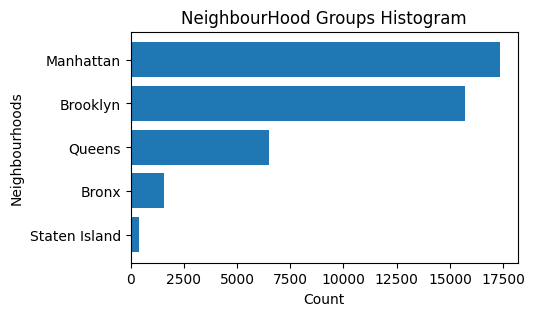

In [35]:
fig, ax = histogram_plot('NeighbourHood Groups Histogram', filtered_data['neighbourhood_group_cleansed'], thresh=200)
fig.set_size_inches(5, 3)
ax.set_xlabel('Count')
ax.set_ylabel('Neighbourhoods');

<ipython-input-36-a5f681cf7e74>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(filtered_data['price'])


<Axes: xlabel='price', ylabel='Density'>

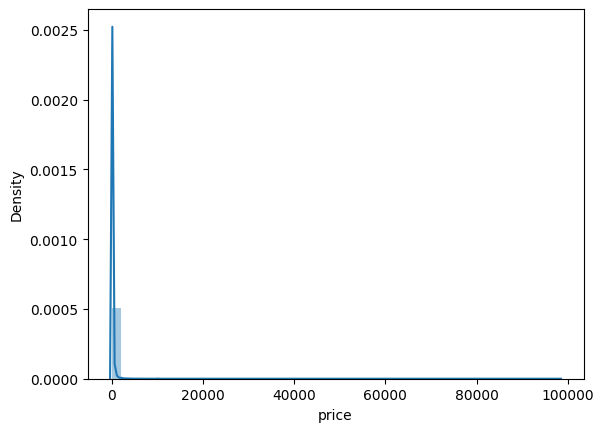

In [36]:
import seaborn as sns

sns.distplot(filtered_data['price'])

Highly skewed data 

<ipython-input-37-def6b4b1a668>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(filtered_data['price'][filtered_data['price'] > 0].apply(np.log))


<Axes: xlabel='price', ylabel='Density'>

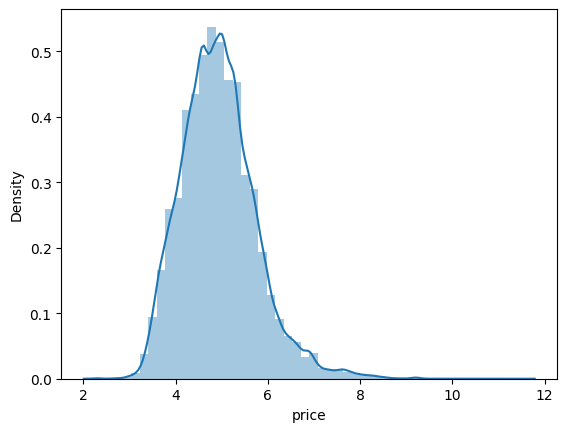

In [37]:
import numpy as np
sns.distplot(filtered_data['price'][filtered_data['price'] > 0].apply(np.log))

predict log prices?

## Feature Engineering

Decision trees / Feature importance plots

PCA to reduce dimensions?

## Model Implementation 

Linear Regression - Baseline

SVM 

Ensemble



## Model Evaluation

RMSE